In [1]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 400

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
from IPython.display import Image

# Данные

In [4]:
df = pd.read_csv(
    # путь к вашему файлу pokemon_full
    '../data/Pokemon/pokemon_full.csv'
)
df.drop('Number', axis=1, inplace=True)

In [5]:
print(df.shape)

df.head()

(721, 22)


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Первый взгляд</h3> 
    </div>
</div>

Построй 4 гистограммы (__histogram__) на 30 бинов главнхых 4 характеристик покемонов: 

* `HP` - здоровья
* `Attack` - уровня атаки
* `Defense` - уровня защиты
* `Speed` - скорости

Конечно, построить их надо на одном графике с 4 подграфиками. Не забудь выделить достаточно места (параметр __figsize__).

Подсказка: используй метод __`hist()`__ у датафрейма.

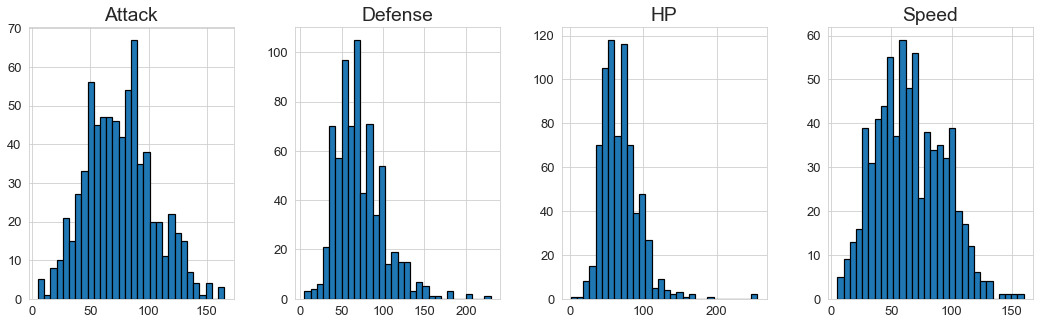

In [6]:
df[['HP', 'Attack', 'Defense', 'Speed']].hist(bins=30, edgecolor='black', linewidth=1.2, layout=(1, 4), figsize=(18, 5));

Что видно? Есть странные большие значения?

Кажется, в __HP__ точно есть одно. Давай построим __boxplot__ и проверим, что оно там наверняка есть.

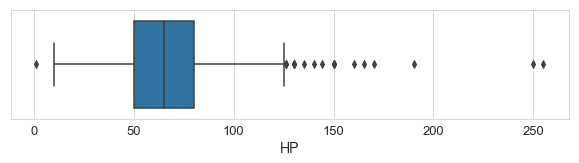

In [7]:
f, ax = plt.subplots(1,1, figsize=(10, 2))
sns.boxplot(df.HP, ax=ax);

<div class="panel panel-warning">
    <div class="panel-heading">
        <h3 class="panel-title">Бонус</h3> 
    </div>
</div>

Прежде всего найди этих странных покемонов! У кого это больше __220__ жизней? А кто этот задохлик, у кого меньше __5__ здоровья? Выведи их имена!

И покажи им, кто здесь главный, урезав им уровень здоровья с помощью __99% винсоризации__!

Не забудь построить снова __boxplot__ и убедиться, что картинка другая. Правда?

Подсказка: используй метод __`scipy.stats.mstats.winsorize()`__

In [8]:
df[(df.HP > 220) | (df.HP < 5)][['Name', 'HP']]

,Name,HP
112,Chansey,250
241,Blissey,255
291,Shedinja,1


In [9]:
import scipy.stats

In [10]:
df.HP = scipy.stats.mstats.winsorize(df.HP, limits=0.01)

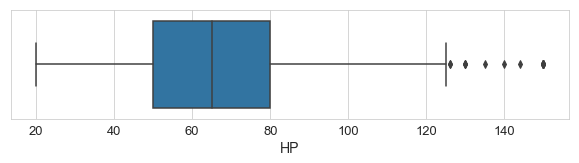

In [11]:
f, ax = plt.subplots(1,1, figsize=(10, 2))
sns.boxplot(df.HP, ax=ax);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Красный значит сильный?</h3> 
    </div>
</div>

У детей 4 лет и немного старше повелось, что красная машинка быстрее ездит, потому что она красная. Красный самолетик быстрее летит. Но бьются ли красные покемоны сильнее всех? 

* Сгруппируй всех покемонов по цвету (`Color`), усредни их атаку (`Attack`) в каждой группе.
* Построй __bar plot__, не забыв:
    * Раскрасить столбцы (каждый в свой цвет) с помощью словаря `colors`.
    * Обвести столбцы черной линией толщиной 1, чтобы белый столбец не потерялся.

/Users/sandpiturtle/Library/Python/3.6/lib/python/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


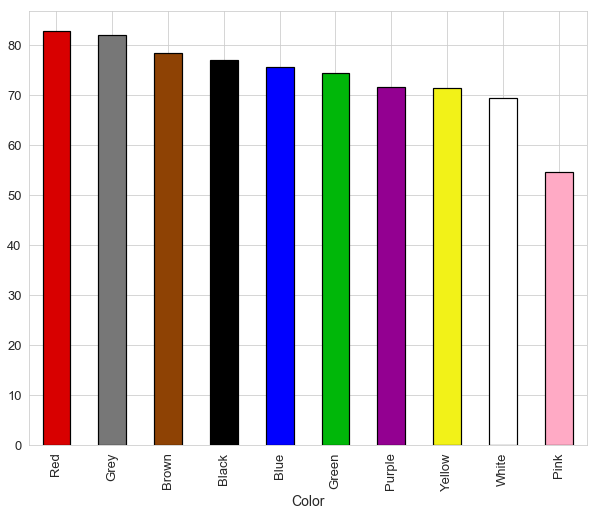

In [12]:
colors = { 
    'Red':    '#d80000',
    'Grey':   '#777777',
    'Brown':  '#8e4204',
    'Black':  '#000000',
    'Blue':   '#0000ff',
    'Green':  '#00b709',
    'Purple': '#930091',
    'Yellow': '#f2f218',
    'White':  '#ffffff',
    'Pink':   '#ffaac5'
}
strengths = df.groupby('Color').agg('mean').Attack.sort_values(ascending=False)
strengths.plot.bar(colors=[colors[x] for x in strengths.index], edgecolor='black', linewidth=1.2);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Тот самый график</h3> 
    </div>
</div>

Нужно построить __stacked normalized bar chart__, на котором будет отлично видно, _какова доля легендарных покемонов в каждом поколении_. 

_Лайфхак:_ если включить мозги, то с помощью __pivot table__ можно облегчить себе работу.

Вот, кстати, как понять __pivot_table__:

In [13]:
df[['Generation','isLegendary']].head()

,Generation,isLegendary
0,1,False
1,1,False
2,1,False
3,1,False
4,1,False


In [14]:
df.groupby('Generation').agg('count')[['isLegendary']]

,isLegendary
Generation,
1,151
2,100
3,135
4,107
5,156
6,72


In [15]:
df_ = df.pivot_table(
    index='Generation',
    columns='isLegendary',
    aggfunc='size')

In [16]:
df_

isLegendary,False,True
Generation,,
1,147,4
2,95,5
3,125,10
4,96,11
5,146,10
6,66,6


In [17]:
df_ = df_.div(df_.sum(axis=1), axis=0)

In [18]:
df_

isLegendary,False,True
Generation,,
1,0.973510,0.026490
2,0.950000,0.050000
3,0.925926,0.074074
4,0.897196,0.102804
5,0.935897,0.064103
6,0.916667,0.083333


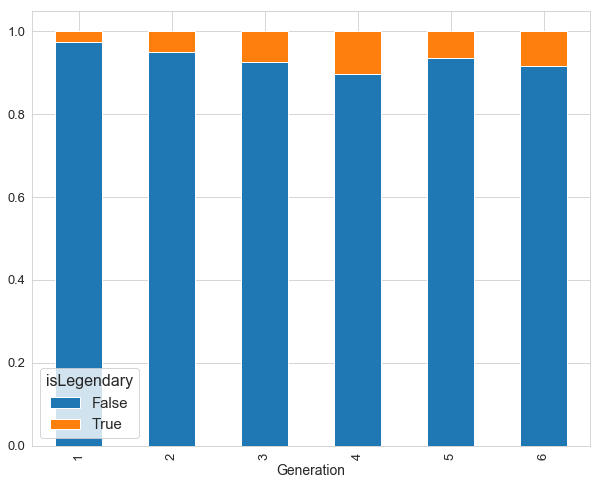

In [19]:
df_.plot.bar(stacked=True);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 4: I8∑π and it was delicious!</h3> 
    </div>
</div>

Сейчас простое задание. Честно. 

Построй __pie chart__ разных типов покемонов. С тенью!

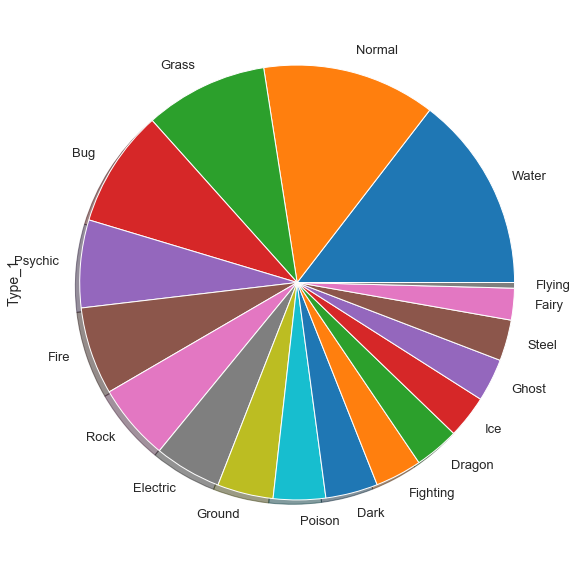

In [20]:
_, ax = plt.subplots(1,1, figsize=(10,10))
df.Type_1.value_counts().plot.pie(shadow=1, ax=ax);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 5: Больше усов</h3> 
    </div>
</div>

Постройте разные __box plot__ силы (__Total__) каждого из типа покемонов (__Type_1__), но отсортируйте их расположение на графике по их __медианам__, от самых слабых к самым сильным.

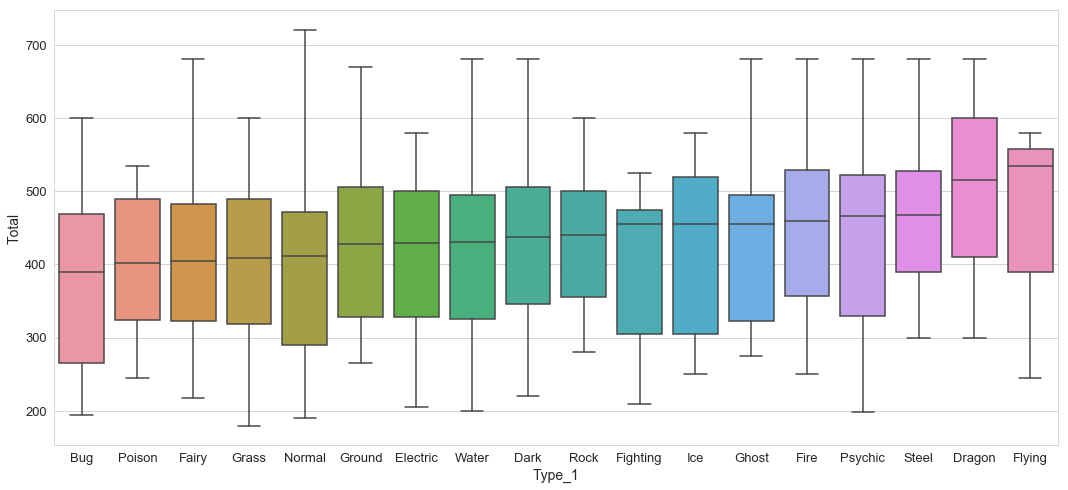

In [21]:
f, ax = plt.subplots(1,1, figsize=(18, 8))
order = df.groupby('Type_1').agg('median').Total.sort_values().index
sns.boxplot(x='Type_1', y='Total', data=df, order=order, ax=ax);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 6: Так и сяк</h3> 
    </div>
</div>

1. Построй __jointplot__ между __Catch Rate__ и __Total__. Обрати внимание, что на нем есть коэффициент корреляции Пирсона и гистограммы величин.
2. Построй __lmplot__ между __Catch Rate__ и __Total__. Обрати внимание, что на нем есть линия, выделяющая зависимость, но нет коэффициента корреляции или гистограмм.
3. Попробуй построить оба графика на __subplots__ matplotlib'а. Убедись, что у тебя не получилось, так как гистограммы на __jointplot__'е тоже упакованы в разные оси.

Разочаруйся.

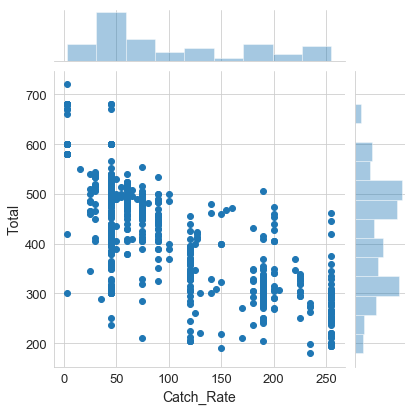

In [22]:
sns.jointplot(x='Catch_Rate', y='Total', data=df);

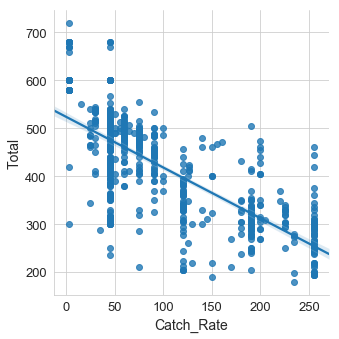

In [23]:
sns.lmplot(x='Catch_Rate', y='Total', data=df);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 7: На голову выше</h3> 
    </div>
</div>

Время проверить, что даже тщедушные легендарные покемоны сильнее даже очень крутых, но простецких, не_легендарных. 

Я буду описывать тебе, как заказчик, что хочу, а ты так и нарисуешь, окда?

* На графике должно быть 4 __violin plot__: для `HP`, `Attack`, `Defense` и `Speed`.
* На каждый из которых должен быть нанесены квартили.
* Каждый из которых должен быть разделенный (__`split=True`__), как [здесь](http://seaborn.pydata.org/examples/grouped_violinplots.html). Но если в примере разделение по полу, то здесь как раз по __isLegendary__.

_Лайфхак:_ если включить мозги, то с помощью __melt__ можно облегчить себе работу.

In [24]:
stats = ['HP', 'Attack', 'Defense', 'Speed']
melted = pd.melt(df[stats + ['isLegendary']], value_vars=stats, id_vars='isLegendary')

In [25]:
df[stats + ['isLegendary']].head()

,HP,Attack,Defense,Speed,isLegendary
0,45,49,49,45,False
1,60,62,63,60,False
2,80,82,83,80,False
3,39,52,43,65,False
4,58,64,58,80,False


In [26]:
melted.head()

,isLegendary,variable,value
0,False,HP,45
1,False,HP,60
2,False,HP,80
3,False,HP,39
4,False,HP,58


In [27]:
df.shape

(721, 22)

In [28]:
melted.shape

(2884, 3)

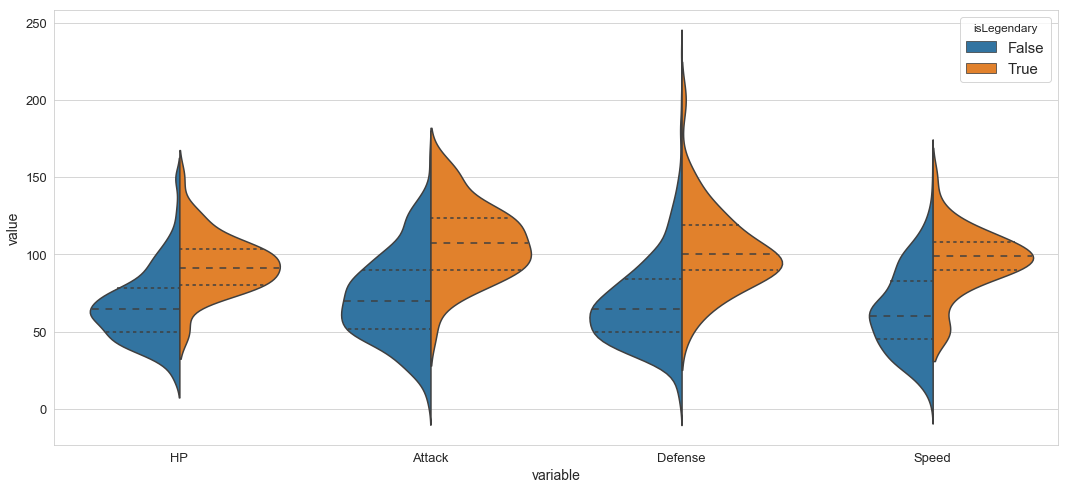

In [29]:
f, ax = plt.subplots(1,1, figsize=(18, 8))
sns.violinplot(x='variable', y='value', hue='isLegendary', data=melted, split=True, inner="quartile");

<div class="panel panel-success" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Финиш!</h3> 
    </div>
</div>

Если ты действительно добрался до этого места в тетрадке и честно все нарисовал, - красавчик! Обязательно расскажи мне об этом на следующем занятии.